In [7]:
from PIL import Image
import glob, os
import matplotlib.image as mpimg
import numpy as np
from numpy import zeros, newaxis
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path = "./pred/"

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [10]:
import matplotlib.image as mpimg
import glob
test=[]

for image_path in glob.glob( path + "*.png"):
    image = mpimg.imread( image_path, format="png")
#     print(image.shape)
    test.append(rgb2gray(image))
len(test)

27

In [11]:
# test

In [12]:
X_test = np.asarray( test, dtype = np.float32)

In [13]:
X_test.shape

(27, 28, 28)

In [14]:
X_test = X_test.reshape(len(X_test),1,28,28).astype('float32')
X_test.shape

(27, 1, 28, 28)

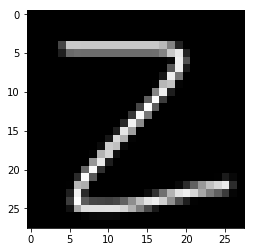

In [15]:
plt.imshow(X_test[1][0], cmap = plt.cm.gray)

In [16]:
X_test[1][0].shape

(28, 28)

In [17]:
img_shape = (28, 28)
def plot_images(images, cls_pred):
    
    # Create figure with 3x3 sub-plots.
    figsize = 15,15
    fig, axes = plt.subplots(3, 9)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap=plt.cm.gray)

        # Show true and predicted classes.
        
        xlabel = "P: {0}".format(cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [18]:
from keras.models import load_model
from sklearn.externals import joblib

m1 = load_model('./models/MNIST_with_no.h5') 

m1_y_pred = m1.predict(X_test)
m1_y_pred_ = [np.around(x) for x in m1_pred]
m1_y_pred = np.argmax(m1_y_pred_, axis=1)
m1_y_pred = m1_y_pred.reshape(m1_y_pred.shape[0],-1)

/Users/ellen/miniconda3/envs/hw/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
m2 = load_model('./models/mnist_with_alphabet.h5')

m2_pred = m1.predict(X_test)
m2_y_pred_ = [np.around(x) for x in m2_pred]
m2_y_pred = np.argmax(m2_y_pred_, axis=1)
m2_y_pred = m2_y_pred.reshape(m2_y_pred.shape[0],-1)
# m1_y_pred

In [20]:
m3 = load_model('./models/MNIST_with_random.h5')

m3_pred = m2.predict(X_test)
m3_y_pred_ = [np.around(x) for x in m3_pred]
m3_y_pred = np.argmax(m3_y_pred_, axis=1)
m3_y_pred = m3_y_pred.reshape(m3_y_pred.shape[0],-1)
# m2_y_pred

In [21]:
m4 = load_model('./models/MNIST_with_mixed.h5')

m4_pred = m4.predict(X_test)
m4_y_pred_ = [np.around(x) for x in m4_pred]
m4_y_pred = np.argmax(m4_y_pred_, axis=1)
m4_y_pred = m4_y_pred.reshape(m4_y_pred.shape[0],-1)
# m3_y_pred

In [22]:
m_rt = joblib.load('./models/MNIST_alpha_noise_RT.sav') 

mrt_y_pred = m_rt.predict(X_test.reshape(X_test.shape[0],784))


In [23]:
images = X_test

In [ ]:
plot_images(images=images, cls_pred=m1_y_pred)

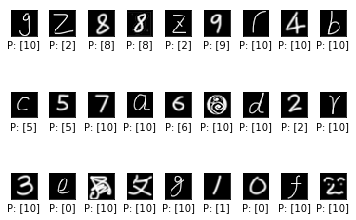

In [24]:
# with alpha
plot_images(images=images, cls_pred=m2_y_pred)

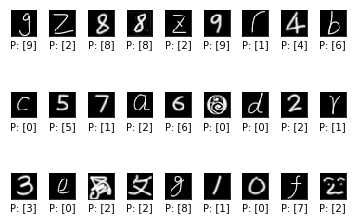

In [25]:
# with random
plot_images(images=images, cls_pred=m3_y_pred)

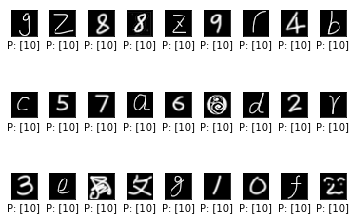

In [26]:
# with mixed
plot_images(images=images, cls_pred=m4_y_pred)

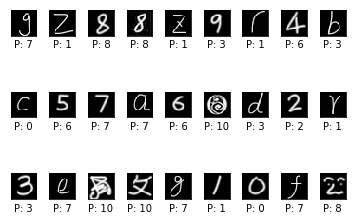

In [27]:
# RF
plot_images(images=images, cls_pred=mrt_y_pred)